In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'????',
 '??????',
 'Agency FB',
 'Algerian',
 'AmeriGarmnd BT',
 'Ami R',
 'Arial',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Bahnschrift',
 'Baskerville BT',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'BernhardFashion BT',
 'Blackadder ITC',
 'Blippo Blk BT',
 'Bodoni Bd BT',
 'Bodoni Bk BT',
 'Bodoni MT',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'BroadwayEngraved BT',
 'Brush Script MT',
 'BrushScript BT',
 'Calibri',
 'Californian FB',
 'Calisto MT',
 'Cambria',
 'Candara',
 'Castellar',
 'CentSchbook BT',
 'Centaur',
 'Century',
 'Century Gothic',
 'Century Schoolbook',
 'Chiller',
 'Colonna MT',
 'Comic Sans MS',
 'CommercialScript BT',
 'Consolas',
 'Constantia',
 'Cooper Black',
 'Cooper Blk BT',
 'Copperplate Gothic Bold',
 'Copperplate Gothic Light',
 'Corbel',
 'Courier New',
 'Courier10 BT',
 'Curlz MT',


In [27]:
mpl.rc('font', family='NanumGothic')

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# DATA Source : http://www.statiz.co.kr/
picher_file_path = './data/picher_stats_2017.csv'
batter_file_path = './data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

print(picher.shape)
print(picher.columns)
picher.head(5)

(152, 22)
Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')


,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64


<AxesSubplot:>

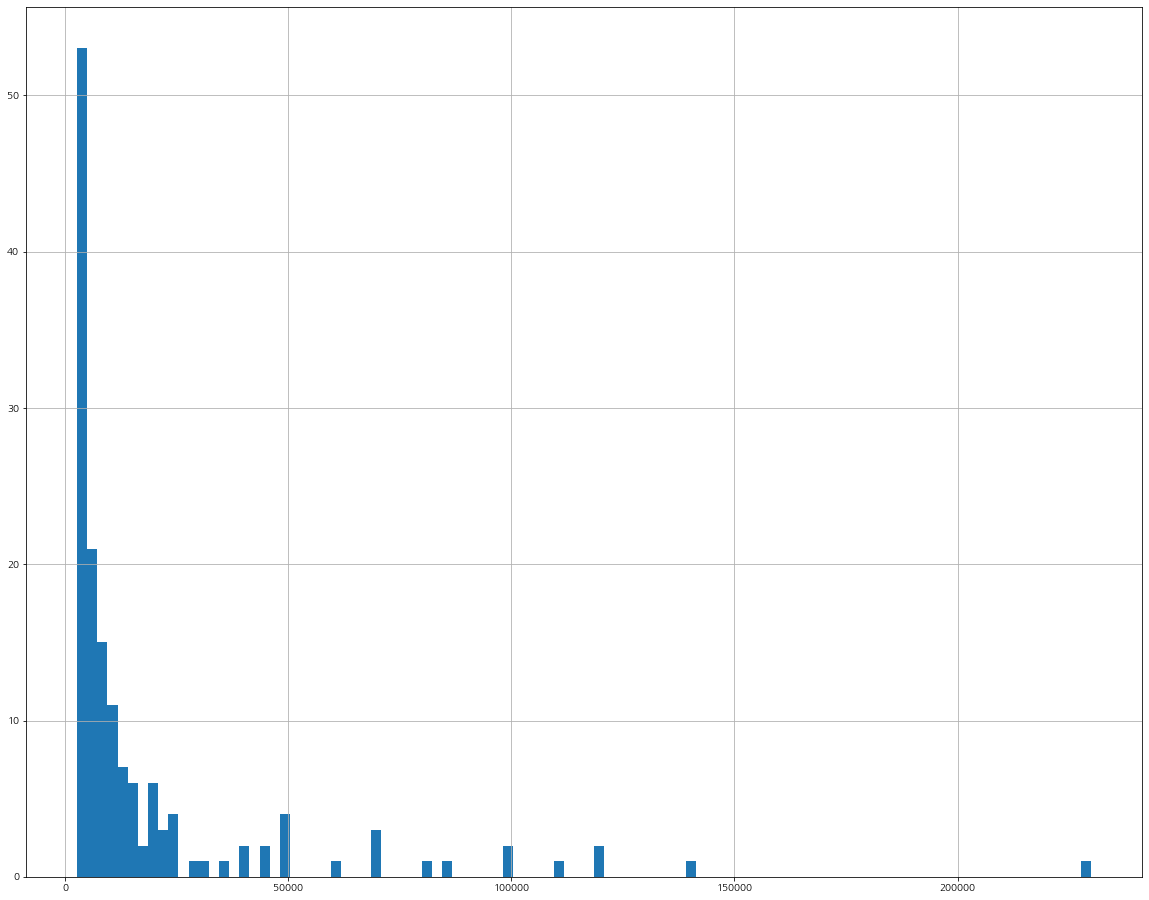

In [29]:
### 예측할 대상인 '연봉'에 대한 정보
print(picher['연봉(2018)'].describe())
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력한다.

<AxesSubplot:>

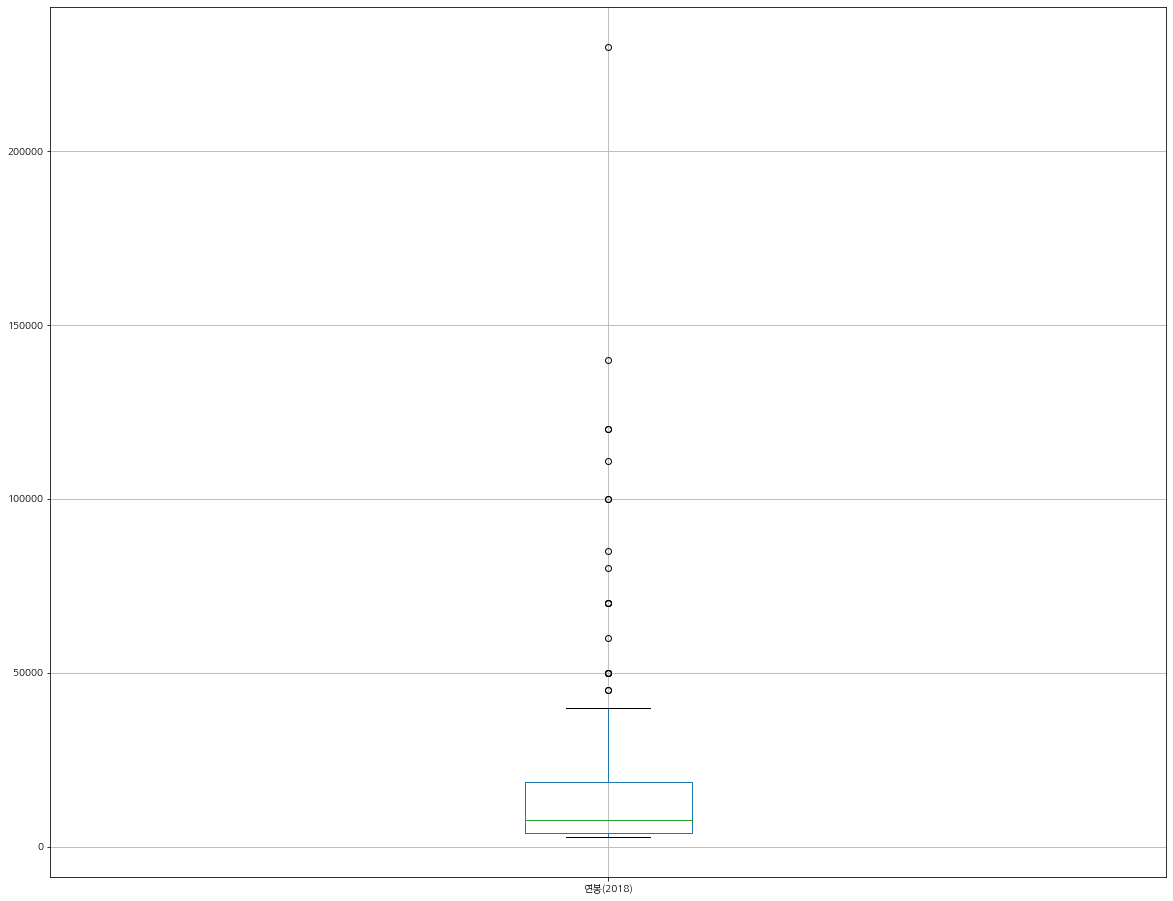

In [30]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 상자 그림을 출력한다.

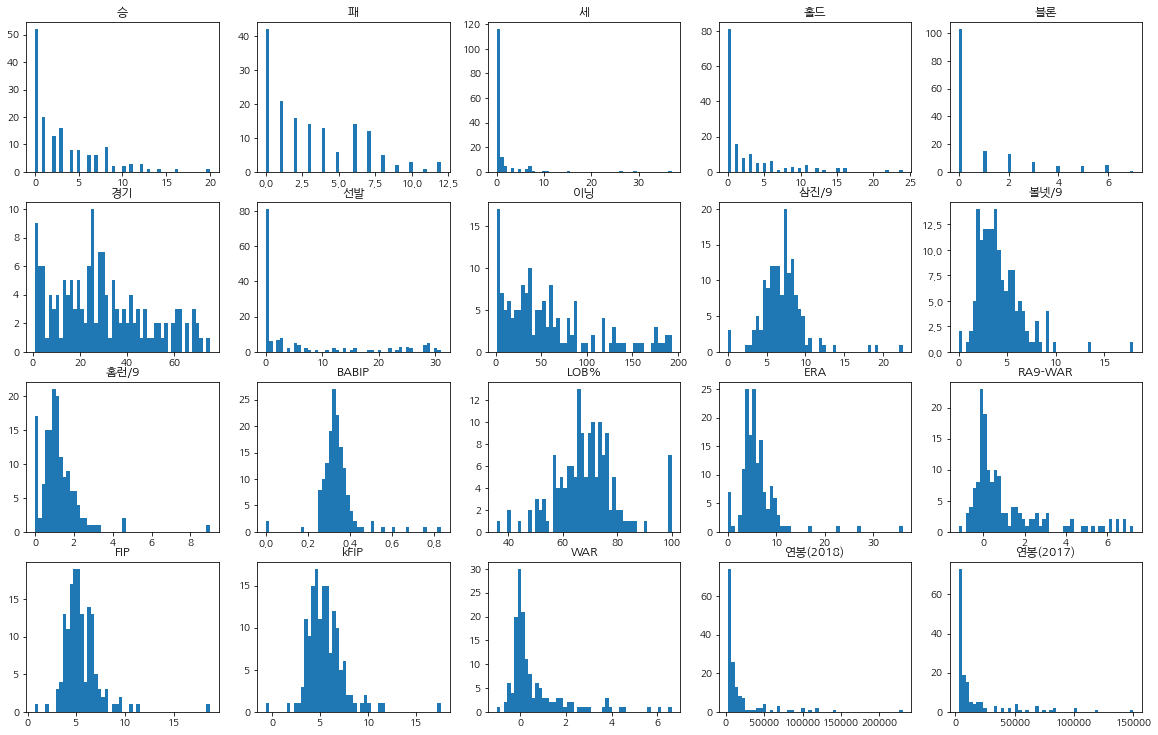

In [31]:
### 회귀 분석에 사용할 피처 살펴보기
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발'
                            , '이닝', '삼진/9', '볼넷/9', '홈런/9','BABIP', 
                             'LOB%', 'ERA', 'RA9-WAR','FIP', 'kFIP', 'WAR', 
                             '연봉(2018)', '연봉(2017)']]

# 피처 각각에 대한 히스토그램을 출력한다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 열 개수 만큼의 subplot을 출력한다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(picher_features_df)